In [1]:
import pandas as pd

single = pd.read_csv("/Users/jacob/Desktop/Research/Knowles/SingleEdgeFreq2.csv")
single = single.drop("Unnamed: 0", axis=1)

In [2]:
single

,Source,Target,Source Time Label,Target Time Label,edge_weight,Source Lifestyle,Target Lifestyle
0,ind-DNK_MH0343_k99_52271,ind-DNK_MH0192_k99_103327,Industrial,Industrial,2.596023,Lytic,Lytic
1,ind-DNK_MH0374_k99_184669,ind-DNK_MH0192_k99_103327,Industrial,Industrial,5.207088,Lytic,Lytic
2,ind-DNK_MH0390_k99_197017,ind-DNK_MH0192_k99_103327,Industrial,Industrial,124.240802,Lytic,Lytic
3,ind-DNK_MH0394_k99_157803,ind-DNK_MH0192_k99_103327,Industrial,Industrial,10.846302,Lytic,Lytic
4,ind-ESP_O2.UC29.1_k99_66998,ind-DNK_MH0192_k99_103327,Industrial,Industrial,8.713587,Lytic,Lytic
...,...,...,...,...,...,...,...
135681,pre-TZA_H8_k119_40821,pre-TZA_H6_k119_91918,Non-Industrial,Non-Industrial,23.303856,Lytic,Lytic
135682,pre-TZA_H9_k119_112156,pre-TZA_H6_k119_91918,Non-Industrial,Non-Industrial,23.303856,Lytic,Lytic
135683,pre-TZA_H8_k119_40821,pre-TZA_H7_k119_54737,Non-Industrial,Non-Industrial,23.303856,Lytic,Lytic
135684,pre-TZA_H9_k119_112156,pre-TZA_H7_k119_54737,Non-Industrial,Non-Industrial,23.303856,Lytic,Lytic


In [3]:
len(list(set(single["Source"])))

5042

In [4]:
Real_Freq = {}
types = ["Industrial", "Pre-modern", "Non-Industrial"]
perms = [ [0,0], [0,1], [0,2], [1,1], [1,2], [2,2] ]    

In [5]:
for pair in perms:
    L = len(single[ ((single["Source Time Label"] == types[pair[0]]) & (single["Target Time Label"] == types[pair[1]])) | 
           ((single["Source Time Label"] == types[pair[1]]) & (single["Target Time Label"] == types[pair[0]])) ])
    
    prop = L/len(single)

    name = types[pair[0]] + " and " + types[pair[1]]

    Real_Freq[name] = prop

In [6]:
Real_Freq

{'Industrial and Industrial': 0.25715991332930443,
 'Industrial and Pre-modern': 0.009964182008460712,
 'Industrial and Non-Industrial': 0.3498739737334729,
 'Pre-modern and Pre-modern': 0.00022109871320548914,
 'Pre-modern and Non-Industrial': 0.01304482407912386,
 'Non-Industrial and Non-Industrial': 0.36973600813643265}

In [7]:
nodes_df = pd.read_csv("/Users/jacob/Downloads/cleaned_cytoscape_table_exported.csv")
#Nodes = Nodes.drop("Unnamed: 0", axis=1)

nodes_df.loc[ (nodes_df["Order"] != "Pre-Industrial") & (nodes_df["Order"] != "Industrial") & (nodes_df["Order"] != "Paleo"), "Time Period" ] = "Database"
nodes_df.loc[nodes_df["Order"] == "Industrial", "Time Period"] = "Industrial"
nodes_df.loc[nodes_df["Order"] == "Pre-Industrial", "Time Period"] = "Pre-Industrial"
nodes_df.loc[nodes_df["Order"] == "Paleo", "Time Period"] = "Paleo"

Nodes = nodes_df

Nodes["Time Period"] = Nodes["Time Period"].replace("Pre-Industrial", "Non-Industrial")
Nodes["Time Period"] = Nodes["Time Period"].replace("Paleo", "Pre-modern")



Nodes_Without_D = Nodes[(Nodes["Time Period"] == "Industrial") | (Nodes["Time Period"] == "Pre-modern") | (Nodes["Time Period"] == "Non-Industrial")]
Nodes_Without_D = Nodes_Without_D.reset_index()
Nodes_D = Nodes
Nodes = Nodes_Without_D

In [8]:
Nodes_D

,Adjusted P-value,Family,Genus,Genus Confidence Score,Lifestyle,name,Order,preVC,Quality,selected,shared name,Topology Confidence Score,VC,VC Avg Distance,VC Families,VC Genera,VC Orders,VC Size,VC Status,Time Period
0,0.723500,Inoviridae,Unassigned,1.0,NaN,Vibrio~phage~VfO4K68,Tubulavirales,preVC_1087,0.7131,False,Vibrio~phage~VfO4K68,0.5159,VC_1087_0,1.414214,1.0,1.0,1.0,2.0,Clustered,Database
1,0.000000,Inoviridae,Saetivirus,1.0,NaN,Vibrio~phage~VFJ,Tubulavirales,preVC_1089,1.0000,False,Vibrio~phage~VFJ,0.0000,VC_1089_0,1.732051,1.0,1.0,1.0,2.0,Clustered,Database
2,0.000000,Inoviridae,Saetivirus,1.0,NaN,Vibrio~phage~fs2,Tubulavirales,preVC_1089,1.0000,False,Vibrio~phage~fs2,0.0000,VC_1089_0,1.732051,1.0,1.0,1.0,2.0,Clustered,Database
3,0.990991,Inoviridae,Fibrovirus,1.0,NaN,Vibrio~virus~fs1,Tubulavirales,preVC_1088,0.9705,False,Vibrio~virus~fs1,0.9617,VC_1088_0,2.339538,1.0,2.0,1.0,6.0,Clustered,Database
4,0.990991,Inoviridae,Villovirus,1.0,NaN,Vibrio~virus~Vf33,Tubulavirales,preVC_1088,0.9705,False,Vibrio~virus~Vf33,0.9617,VC_1088_0,2.339538,1.0,2.0,1.0,6.0,Clustered,Database
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8704,0.996964,Industrial,Industrial,1.0,Lytic,ind-DNK_MH0394_k99_157803,Industrial,preVC_2,0.0867,False,ind-DNK_MH0394_k99_157803,0.0864,VC_2_6,4.163332,0.0,0.0,0.0,3.0,Clustered,Industrial
8705,0.912040,Industrial,Industrial,1.0,Lytic,ind-DNK_MH0390_k99_197017,Industrial,preVC_1,0.0409,False,ind-DNK_MH0390_k99_197017,0.0373,VC_1_4,8.426150,0.0,0.0,0.0,2.0,Clustered,Industrial
8706,0.000000,Industrial,Industrial,1.0,Lytic,ind-DNK_MH0374_k99_184669,Industrial,preVC_2,0.0000,False,ind-DNK_MH0374_k99_184669,0.0000,VC_2_4,0.000000,0.0,0.0,0.0,1.0,Clustered/Singleton,Industrial
8707,0.912040,Industrial,Industrial,1.0,Lytic,ind-DNK_MH0192_k99_103327,Industrial,preVC_1,0.0409,False,ind-DNK_MH0192_k99_103327,0.0373,VC_1_4,8.426150,0.0,0.0,0.0,2.0,Clustered,Industrial


In [9]:
from collections import Counter
frequency = Counter(Nodes["Time Period"])
frequency

Counter({'Pre-modern': 87, 'Non-Industrial': 2845, 'Industrial': 2337})

In [10]:
count2 = Counter(Nodes_D["Time Period"])
count2

Counter({'Database': 3440,
         'Pre-modern': 87,
         'Non-Industrial': 2845,
         'Industrial': 2337})

In [11]:
import random
random.seed(1)

ind = list(Nodes.index)
first = random.sample(ind, len(ind))
sources = Nodes.iloc[first]["Time Period"].tolist()
second = random.sample(ind, len(ind))
targets = Nodes.iloc[second]["Time Period"].tolist()

resampled = pd.DataFrame({"Source Time Label" : sources, "Target Time Label" : targets})
resampled

,Source Time Label,Target Time Label
0,Industrial,Industrial
1,Non-Industrial,Non-Industrial
2,Non-Industrial,Industrial
3,Non-Industrial,Pre-modern
4,Non-Industrial,Industrial
...,...,...
5264,Non-Industrial,Industrial
5265,Industrial,Non-Industrial
5266,Industrial,Industrial
5267,Non-Industrial,Non-Industrial


In [12]:
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np

/Users/jacob/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
Nodes_D

types_D = ["Industrial", "Pre-modern", "Non-Industrial", 'Database']
perms_D = [ [0,0], [0,1], [0,2], [0,3], [1,1], [1,2], [1,3], [2,2], [2,3], [3,3] ]

Simulated_Freq_D = {'Industrial and Industrial': [],
 'Industrial and Pre-modern': [],
 'Industrial and Non-Industrial': [],
 'Industrial and Database': [],
 'Pre-modern and Pre-modern': [],
 'Pre-modern and Non-Industrial': [],
 'Pre-modern and Database': [],
 'Non-Industrial and Non-Industrial': [],
 'Non-Industrial and Database': [], 
 'Database and Database': []}

for i in range(1000):
    ind = list(Nodes_D.index)
    first = random.sample(ind, len(ind))
    sources = Nodes_D.iloc[first]["Time Period"].tolist()
    second = random.sample(ind, len(ind))
    targets = Nodes_D.iloc[second]["Time Period"].tolist()

    resampled = pd.DataFrame({"Source Time Label" : sources, "Target Time Label" : targets})



    for pair in perms_D:
        L = len(resampled[ ((resampled["Source Time Label"] == types_D[pair[0]]) & (resampled["Target Time Label"] == types_D[pair[1]])) | 
            ((resampled["Source Time Label"] == types_D[pair[1]]) & (resampled["Target Time Label"] == types_D[pair[0]])) ])
        
        prop = L/len(resampled)

        name = types_D[pair[0]] + " and " + types_D[pair[1]]

        Simulated_Freq_D[name].append(prop)

In [14]:
Simulated_Means_D = {}

for key in Simulated_Freq_D.keys():
    M = sum(Simulated_Freq_D[key])/len(Simulated_Freq_D[key])
    Simulated_Means_D[key] = M

In [15]:
single_database = pd.read_csv("/Users/jacob/Desktop/Research/Knowles/SingleEdgeFreq_Database.csv")


/var/folders/0h/xlbp07_12rq0kpnfc4zz21fh0000gn/T/ipykernel_51589/3225561544.py:1: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  single_database = pd.read_csv("/Users/jacob/Desktop/Research/Knowles/SingleEdgeFreq_Database.csv")


In [16]:
single_database


,Unnamed: 0,Source,Target,Source Time Label,Target Time Label,edge_weight,Source Lifestyle,Target Lifestyle
0,0,ind-DNK_MH0343_k99_52271,ind-DNK_MH0192_k99_103327,Industrial,Industrial,2.596023,Lytic,Lytic
1,1,ind-DNK_MH0374_k99_184669,ind-DNK_MH0192_k99_103327,Industrial,Industrial,5.207088,Lytic,Lytic
2,2,ind-DNK_MH0390_k99_197017,ind-DNK_MH0192_k99_103327,Industrial,Industrial,124.240802,Lytic,Lytic
3,3,ind-DNK_MH0394_k99_157803,ind-DNK_MH0192_k99_103327,Industrial,Industrial,10.846302,Lytic,Lytic
4,4,ind-ESP_O2.UC29.1_k99_66998,ind-DNK_MH0192_k99_103327,Industrial,Industrial,8.713587,Lytic,Lytic
...,...,...,...,...,...,...,...,...
229586,229586,Yersinia~phage~vB_YenP_AP10,Yersinia~phage~phiYe-F10,Database,Database,48.668208,NaN,NaN
229587,229587,Yersinia~phage~vB_YenP_AP5,Yersinia~phage~phiYe-F10,Database,Database,134.264786,NaN,NaN
229588,229588,Yersinia~phage~vB_YenP_AP10,Yersinia~phage~phiYeO3-12,Database,Database,39.384131,NaN,NaN
229589,229589,Yersinia~phage~vB_YenP_AP5,Yersinia~phage~phiYeO3-12,Database,Database,141.070879,NaN,NaN


In [17]:
len(list(set(single_database["Source"])))

8369

In [18]:
Real_Freq_D = {}
types_D = ["Industrial", "Pre-modern", "Non-Industrial", 'Database']
perms_D = [ [0,0], [0,1], [0,2], [0,3], [1,1], [1,2], [1,3], [2,2], [2,3], [3,3] ]

In [19]:

for pair in perms_D:
    L = len(single_database[ ((single_database["Source Time Label"] == types_D[pair[0]]) & (single_database["Target Time Label"] == types_D[pair[1]])) | 
           ((single_database["Source Time Label"] == types_D[pair[1]]) & (single_database["Target Time Label"] == types_D[pair[0]])) ])
    
    prop = L/len(single_database)

    name = types_D[pair[0]] + " and " + types_D[pair[1]]

    Real_Freq_D[name] = prop

In [20]:
Real_Freq_D

{'Industrial and Industrial': 0.15197895387885413,
 'Industrial and Pre-modern': 0.005888732572269819,
 'Industrial and Non-Industrial': 0.2067720424581103,
 'Industrial and Database': 0.024669956574952853,
 'Pre-modern and Pre-modern': 0.0001306671428758096,
 'Pre-modern and Non-Industrial': 0.007709361429672766,
 'Pre-modern and Database': 0.0011716487144530926,
 'Non-Industrial and Non-Industrial': 0.2185103074597872,
 'Non-Industrial and Database': 0.04341633600620234,
 'Database and Database': 0.3397519937628217}

In [21]:
def add_confidence_interval(data, ax):
    mean = np.mean(data)
    confidence_interval = [] # = stats.norm.interval(0.95, loc=mean, scale=np.std(data)/np.sqrt(len(data)))
    confidence_interval.append(np.percentile(data,2.5))
    confidence_interval.append(np.percentile(data,97.5))

    

    # Add confidence interval bars
    ax.axvline(x=confidence_interval[0], color='green', linestyle='--', label='95% CI lower bound')
    ax.axvline(x=confidence_interval[1], color='green', linestyle='--', label='95% CI upper bound')
    ax.axvline(x=mean, color='blue', linestyle='-', label='Mean')

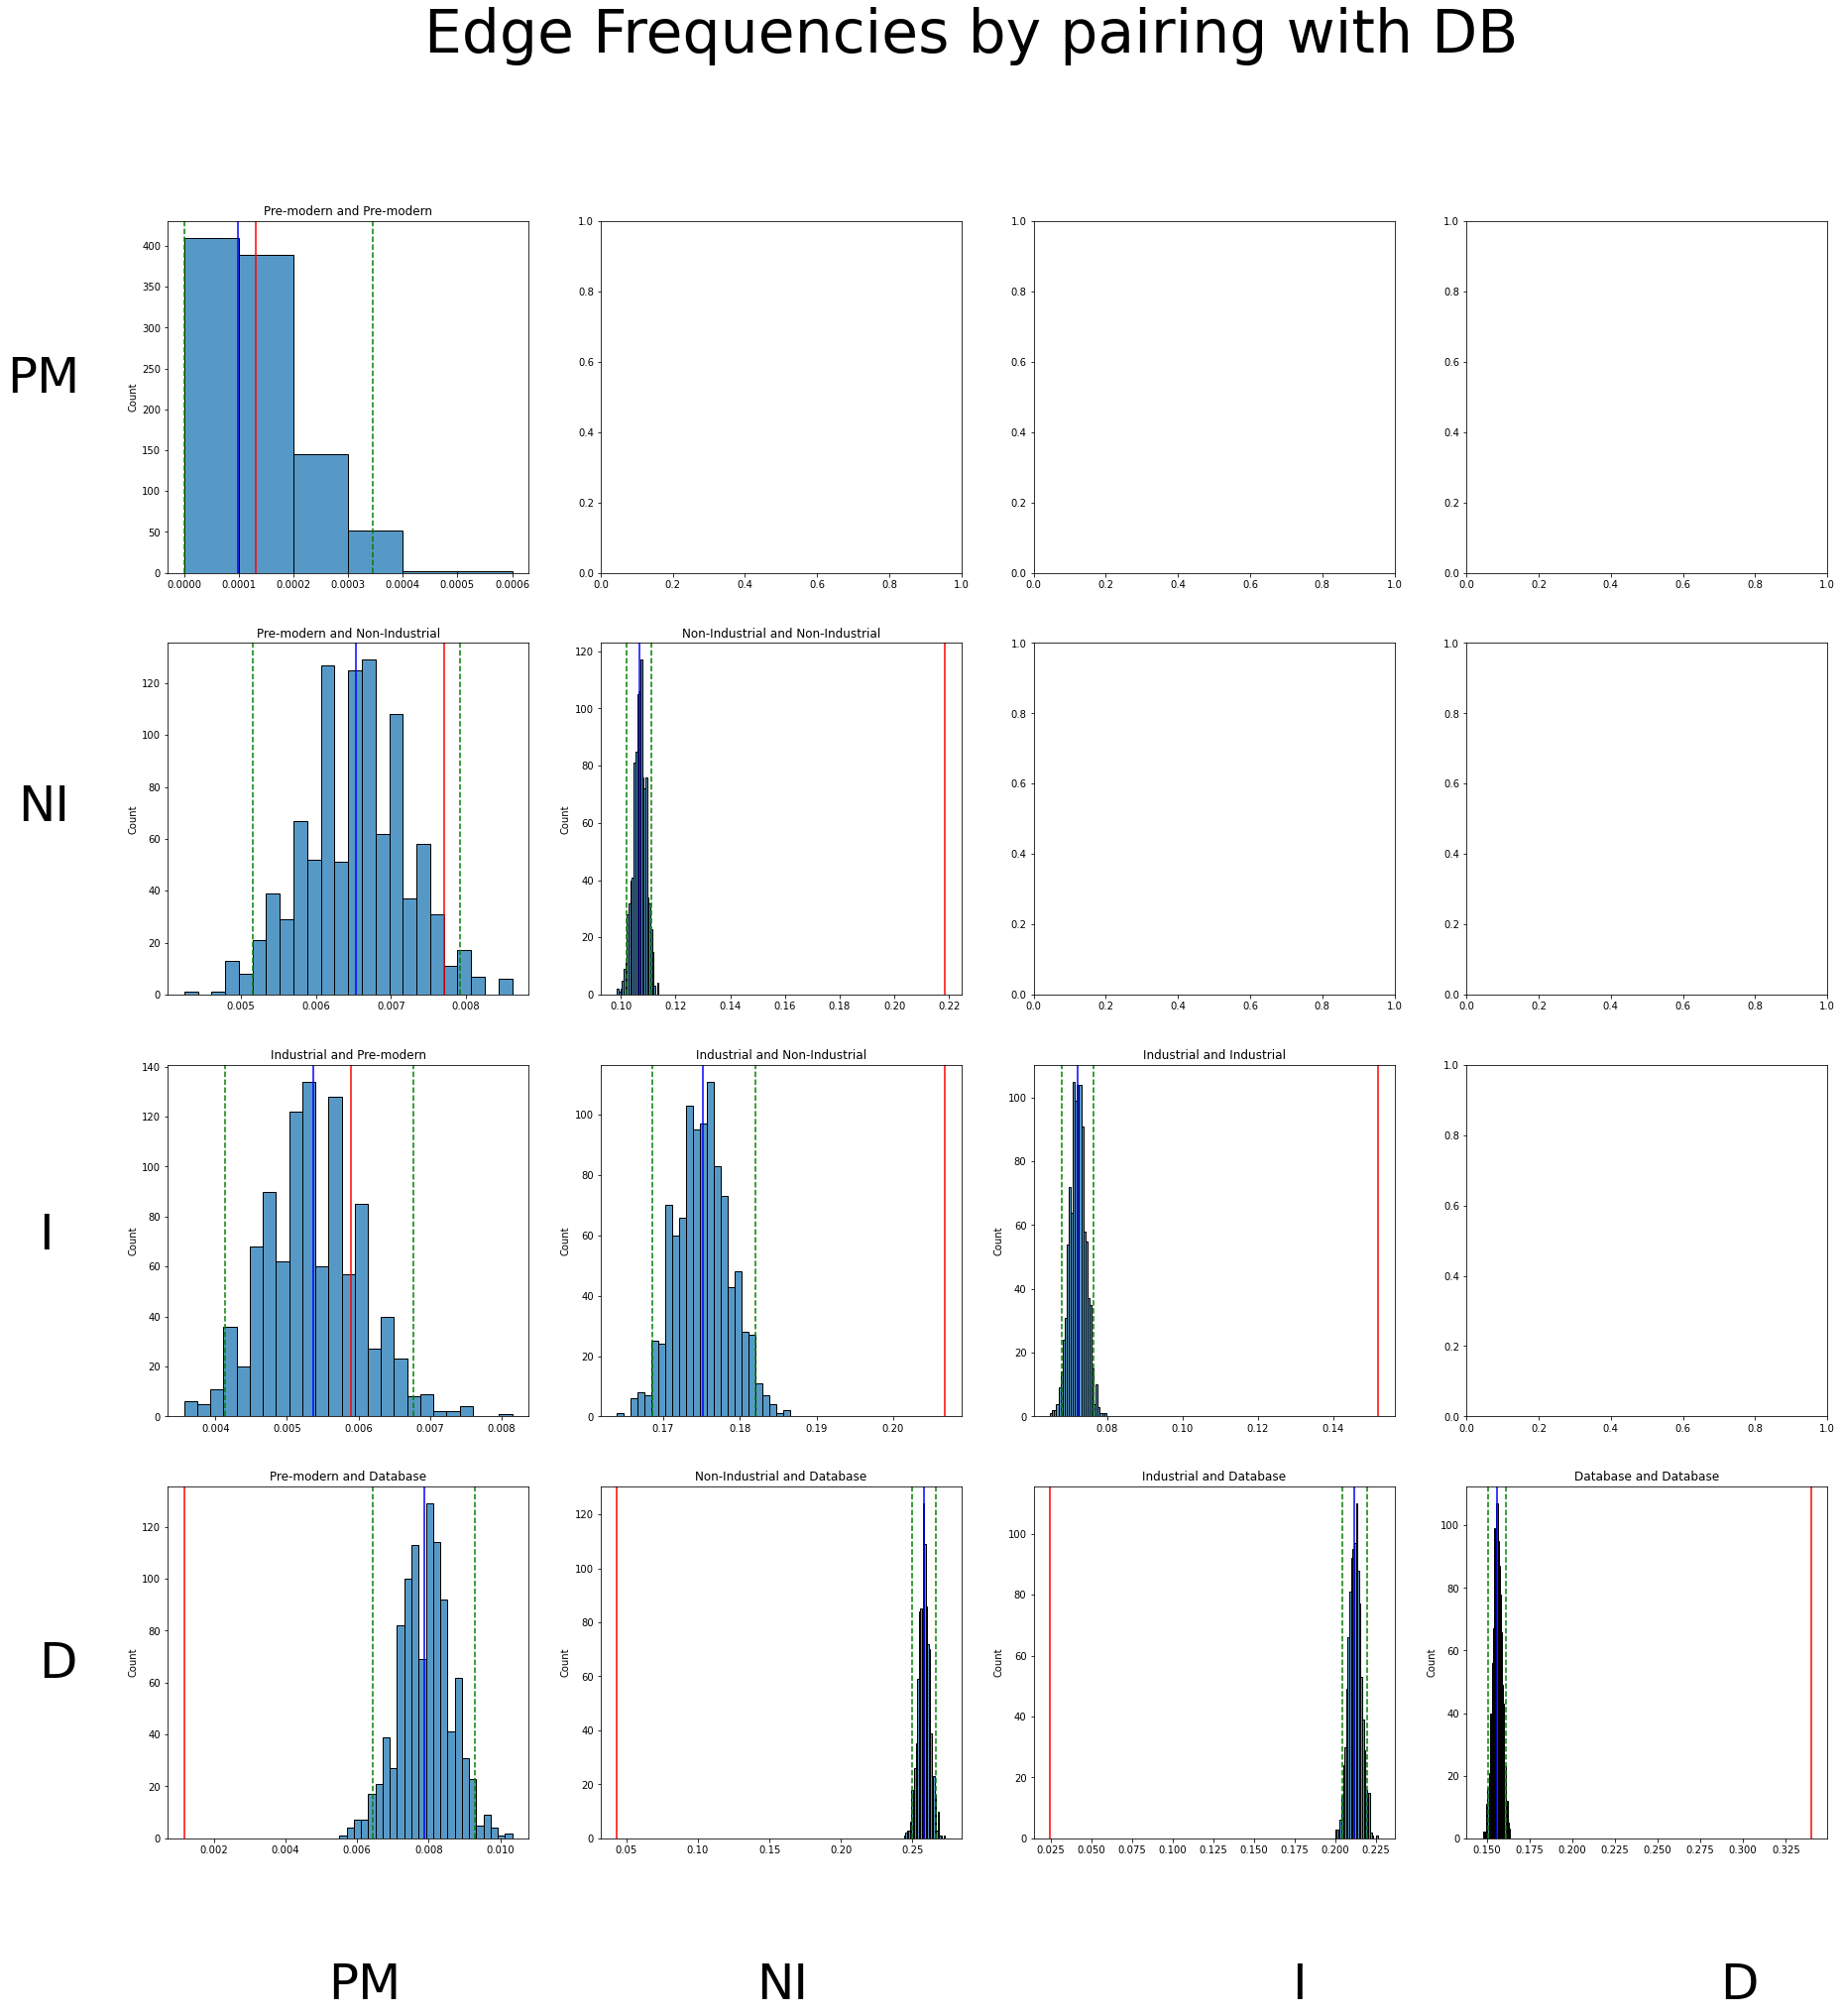

In [22]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, axs  = plt.subplots(4,4, figsize = (30, 30))
fig.suptitle("Edge Frequencies by pairing with DB", size = 60)

sns.histplot(Simulated_Freq_D["Pre-modern and Pre-modern"], ax = axs[0,0], binwidth= .0001)
axs[0,0].axvline(x = Real_Freq_D['Pre-modern and Pre-modern'], color = "red")
axs[0,0].set_title("Pre-modern and Pre-modern")
add_confidence_interval(Simulated_Freq_D["Pre-modern and Pre-modern"], axs[0,0])


sns.histplot(Simulated_Freq_D["Pre-modern and Non-Industrial"], ax = axs[1,0])
axs[1,0].axvline(x = Real_Freq_D['Pre-modern and Non-Industrial'], color = "red")
axs[1,0].set_title("Pre-modern and Non-Industrial")
add_confidence_interval(Simulated_Freq_D["Pre-modern and Non-Industrial"], axs[1,0])


sns.histplot(Simulated_Freq_D["Non-Industrial and Non-Industrial"], ax = axs[1,1])
axs[1,1].axvline(x = Real_Freq_D['Non-Industrial and Non-Industrial'], color = "red")
axs[1,1].set_title("Non-Industrial and Non-Industrial")
add_confidence_interval(Simulated_Freq_D["Non-Industrial and Non-Industrial"], axs[1,1])


sns.histplot(Simulated_Freq_D["Industrial and Pre-modern"], ax = axs[2,0])
axs[2,0].axvline(x = Real_Freq_D['Industrial and Pre-modern'], color = "red")
axs[2,0].set_title("Industrial and Pre-modern")
add_confidence_interval(Simulated_Freq_D["Industrial and Pre-modern"], axs[2,0])


sns.histplot(Simulated_Freq_D["Industrial and Non-Industrial"], ax = axs[2,1])
axs[2,1].axvline(x = Real_Freq_D['Industrial and Non-Industrial'], color = "red")
axs[2,1].set_title("Industrial and Non-Industrial")
add_confidence_interval(Simulated_Freq_D["Industrial and Non-Industrial"], axs[2,1])


sns.histplot(Simulated_Freq_D["Industrial and Industrial"], ax = axs[2,2])
axs[2,2].axvline(x = Real_Freq_D['Industrial and Industrial'], color = "red")
axs[2,2].set_title("Industrial and Industrial")
add_confidence_interval(Simulated_Freq_D["Industrial and Industrial"], axs[2,2])


sns.histplot(Simulated_Freq_D["Pre-modern and Database"], ax = axs[3,0])
axs[3,0].axvline(x = Real_Freq_D['Pre-modern and Database'], color = "red")
axs[3,0].set_title("Pre-modern and Database")
add_confidence_interval(Simulated_Freq_D["Pre-modern and Database"], axs[3,0])


sns.histplot(Simulated_Freq_D["Non-Industrial and Database"], ax = axs[3,1])
axs[3,1].axvline(x = Real_Freq_D['Non-Industrial and Database'], color = "red")
axs[3,1].set_title("Non-Industrial and Database")
add_confidence_interval(Simulated_Freq_D["Non-Industrial and Database"], axs[3,1])


sns.histplot(Simulated_Freq_D["Industrial and Database"], ax = axs[3,2])
axs[3,2].axvline(x = Real_Freq_D['Industrial and Database'], color = "red")
axs[3,2].set_title("Industrial and Database")
add_confidence_interval(Simulated_Freq_D["Industrial and Database"], axs[3,2])


sns.histplot(Simulated_Freq_D["Database and Database"], ax = axs[3,3])
axs[3,3].axvline(x = Real_Freq_D['Database and Database'], color = "red")
axs[3,3].set_title("Database and Database")
add_confidence_interval(Simulated_Freq_D["Database and Database"], axs[3,3])



fig.text(.05,.8, "PM", size = 50)
fig.text(.055,.6, "NI", size = 50)
fig.text(.065,.4, "I", size = 50)
fig.text(.065,.2, "D", size = 50)


fig.text(.20, .05, "PM", size = 50)
fig.text(.4, .05, "NI", size = 50)
fig.text(.65, .05, "I", size = 50)
fig.text(.85, .05, "D", size = 50)

fig.savefig("/Users/jacob/Desktop/Research/Knowles/BIG Summer/Coprolite_Network_Permutation_Figure.pdf", format = "pdf")

In [23]:
columns_D = ['Industrial and Industrial','Industrial and Pre-modern', 'Industrial and Non-Industrial', 
             'Industrial and Database', 'Pre-modern and Pre-modern', 'Pre-modern and Non-Industrial', 
             'Pre-modern and Database', 'Non-Industrial and Non-Industrial', 'Non-Industrial and Database', 
             'Database and Database']
rows = ["observed", "simulated mean", "upper bound", "lower bound"]

info_D = pd.DataFrame(columns=columns_D, index=rows)

for col in info_D.columns:
    info_D.loc["observed", col] = Real_Freq_D[col]
    info_D.loc["simulated mean", col] = np.mean(Simulated_Freq_D[col])
    info_D.loc["upper bound", col] = np.percentile(Simulated_Freq_D[col], 97.5)
    info_D.loc["lower bound", col] = np.percentile(Simulated_Freq_D[col], 2.5)

In [24]:
info_D

info_D.to_csv("/Users/jacob/Desktop/Research/Knowles/BIG Summer/Coprolite_Network_Permutation_Table.csv", index=True)